# Breast Cancer Prediction

In [75]:
#importing Libraries.
import pandas as pd #for data manupulation or analysis
import numpy as np # for mumeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [76]:
#import the dataframe as dataset.
dataset=pd.read_csv('Breast Cancer Prediction.csv')

In [77]:
#reading dataset.
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


# Data Wrangling

In [78]:

#Checking for null values.
dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [79]:
dataset.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


# Data visualization

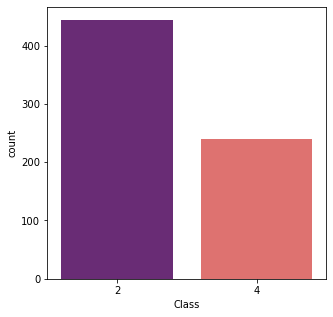

In [81]:
#Visualization of data 
plt.figure(figsize=(5,5))
sns.countplot(x='Class', data=dataset, palette='magma')  
datasetNew=dataset.drop(columns=["Sample code number"],axis=1) 

<AxesSubplot:>

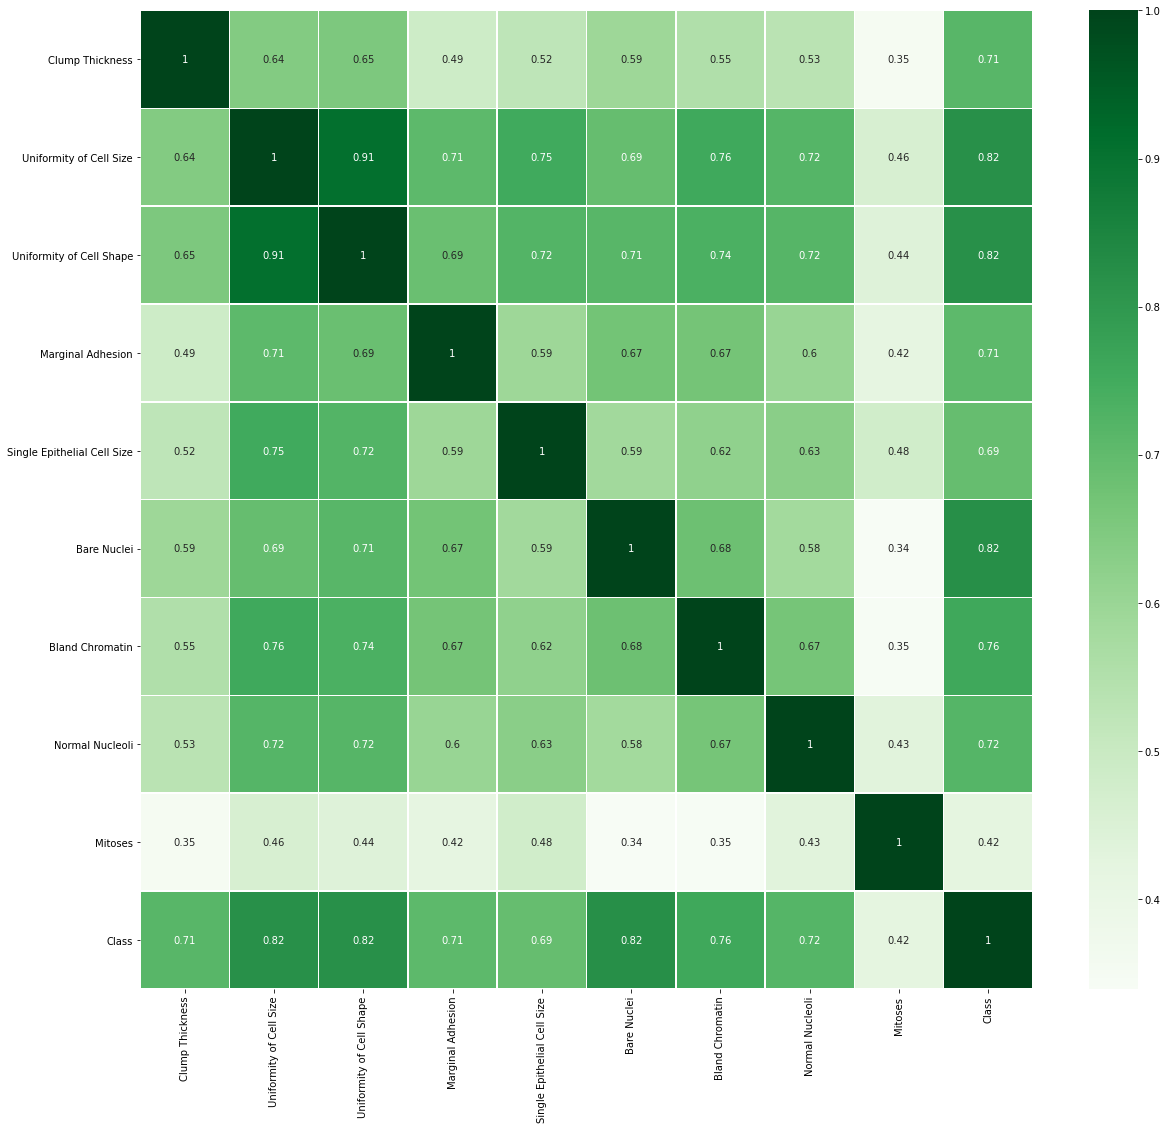

In [82]:
#Visualization of data 
plt.figure(figsize=(20,18))
sns.heatmap(datasetNew.corr(), annot=True,linewidths=.5, cmap="Greens")

Class
2    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
4    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

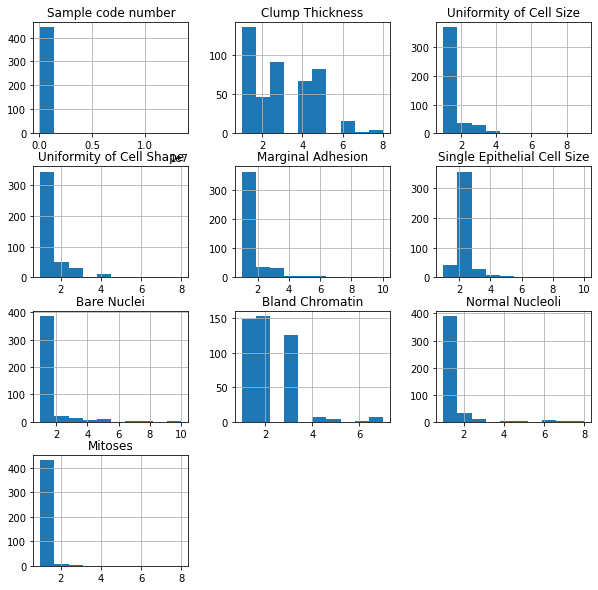

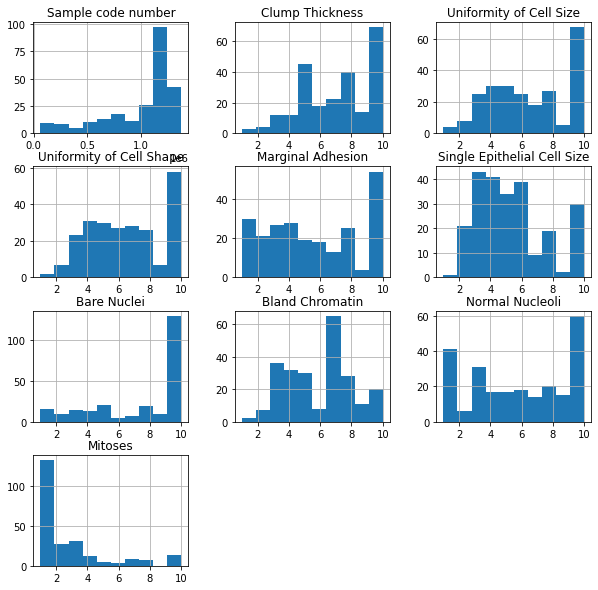

In [83]:
#Visualization of data 
dataset.groupby('Class').hist(figsize=(10, 10))

In [84]:
#exect x and y data from dataset.
x=dataset.iloc[:, 1: 10].values
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [85]:
y=dataset.iloc[:, 10].values
y


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

# Split dataset

In [86]:
#splitting the data first into two part -- doing a 80:20 split i.e 80% for train set and 20% for test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=0)

In [87]:
x_train , y_train , x_test, y_test

(array([[ 7,  6, 10, ...,  9, 10,  2],
        [ 8,  3,  8, ...,  8,  9,  8],
        [ 8, 10, 10, ..., 10, 10,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 3,  1,  1, ...,  2,  1,  1],
        [10,  9,  7, ...,  7,  7,  1]], dtype=int64),
 array([4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2,
        2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4,
        2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
        4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
        2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2,
        2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4,
        4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4,
        2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
        4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2

In [88]:
x_train.shape , y_train.shape , x_test.shape,y_test.shape

((512, 9), (512,), (171, 9), (171,))

# Data Scaling

In [89]:
#Feasture Scaling datasets
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


# Model Selection

In [90]:
#Support Vector Machine Algorithm
from sklearn.svm import SVC

classifier=SVC(kernel="linear",random_state=0)
classifier=SVC(kernel="rbf",random_state=0)
classifier=SVC(kernel="poly",random_state=0,degree=9)
classifier=SVC(kernel="sigmoid",random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [91]:
#Predicting the test set result
y_pred = classifier.predict(x_test)
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [92]:
##Creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix =\n",cm)
print("Accuracy of svc model = ",accuracy_score(y_test, y_pred))


Confusion Matrix =
 [[102   5]
 [  3  61]]
Accuracy of svc model =  0.9532163742690059


In [93]:
#RandomForstClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion = 'entropy',
                                  random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [94]:
#Predicting the test set result
y_pred = classifier.predict(x_test)
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [95]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix =\n",cm)
print("Accuracy of Random Forest model = ",accuracy_score(y_test, y_pred))


Confusion Matrix =
 [[104   3]
 [  4  60]]
Accuracy of Random Forest model =  0.9590643274853801


In [96]:
#K neighbors classifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)



KNeighborsClassifier()

In [97]:
y_pred = classifier.predict(x_test)
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

In [98]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix =\n",cm)
print("Accuracy of KNN model = ",accuracy_score(y_test, y_pred))


Confusion Matrix =
 [[103   4]
 [  5  59]]
Accuracy of KNN model =  0.9473684210526315


# Prediction for new patient

In [72]:
#new paitent prediction 
new_patient=classifier.predict(sc.transform([[5,1,1,1,2,1,3,1,1]]))
if new_patient[0]==4:
    print("TYPE: Malignant")
else:
    print("TYPE: Benign")

TYPE: Benign


In [73]:
new_patient=classifier.predict(sc.transform([[5,4,5,6,8,4,10,2,3]]))
if new_patient[0]==4:
    print("TYPE: Malignant")
else:
    print("TYPE: Benign")

TYPE: Malignant
